> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.9 - Visualização de Dados

## Exercícios
Vamos trabalhar com as mesmas bases de dados do exercício de Pandas. Aqui estão os links caso você queira baixar novamente, mas recomendo trabalhar com o `wc_formatado.csv` que exportamos na questão Q2 do exercício anterior.

* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv
* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv

Para relembrar, essas são as colunas do dataframe:
```
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_penalti     170 non-null    string        
 15  gols_2_penalti     119 non-null    string        
 16  cartao_vermelho_1  59 non-null     string        
 17  cartao_vermelho_2  65 non-null     string        
 18  cartao_amarelo_1   834 non-null    string        
 19  cartao_amarelo_2   857 non-null    string        
 20  copa               1312 non-null   string 
```

#### Q1.
Realize todos os imports necessários para executar as três bibliotecas de visualização que conhecemos:
* Matplotlib (lembre-se do comando mágico)
* Seaborn
* Plotly

Para cada uma delas, altere o tema padrão de visualização. 

In [1]:
# Imports necessários
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio

# Comando mágico para exibir gráficos no notebook (caso esteja usando Jupyter)
%matplotlib inline

# -----------------------------
# Alterando o tema do Matplotlib
# -----------------------------
plt.style.use('ggplot')  # Outros estilos: 'seaborn', 'bmh', 'fivethirtyeight', etc.

# -----------------------------
# Alterando o tema do Seaborn
# -----------------------------
sns.set_theme(style="darkgrid")  # Outros estilos: "whitegrid", "dark", "white", "ticks"

# -----------------------------
# Alterando o tema do Plotly
# -----------------------------
pio.templates.default = "plotly_dark"  # Outros: 'plotly', 'ggplot2', 'seaborn', 'simple_white'

#### Q2.
Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna `comparecimento`.  

Lembre-se que alguns jogos estavam com público 0 incorretamente, que tal remover essas ocorrências para não atrapalhar sua visualzação?

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

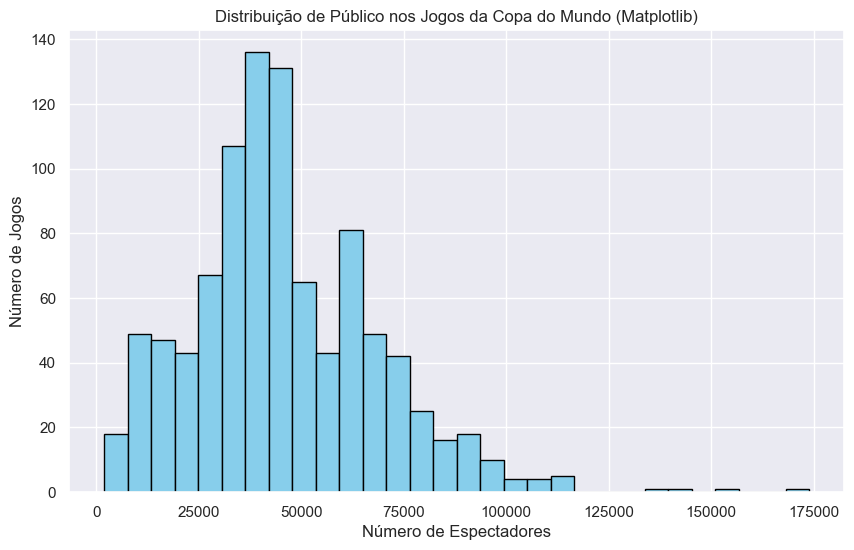

In [11]:
#### Solução com matplotlib
import matplotlib.pyplot as plt

df_filtrado = df[df['Attendance'] > 0]

plt.figure(figsize=(10,6))
plt.hist(df_filtrado['Attendance'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição de Público nos Jogos da Copa do Mundo (Matplotlib)')
plt.xlabel('Número de Espectadores')
plt.ylabel('Número de Jogos')
plt.grid(True)
plt.show()

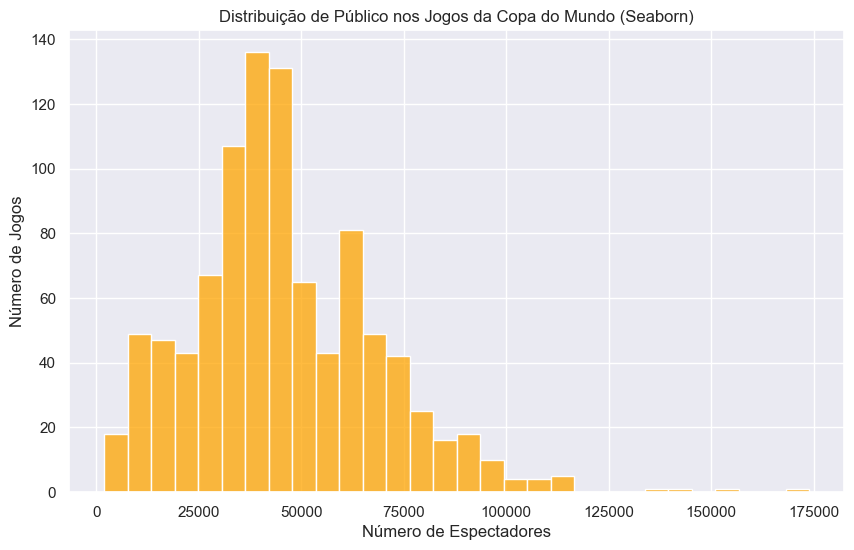

In [12]:
#### solução com seaborn
import seaborn as sns
import matplotlib.pyplot as plt

df_filtrado = df[df['Attendance'] > 0]

plt.figure(figsize=(10,6))
sns.histplot(df_filtrado['Attendance'], bins=30, color='orange', kde=False)
plt.title('Distribuição de Público nos Jogos da Copa do Mundo (Seaborn)')
plt.xlabel('Número de Espectadores')
plt.ylabel('Número de Jogos')
plt.show()

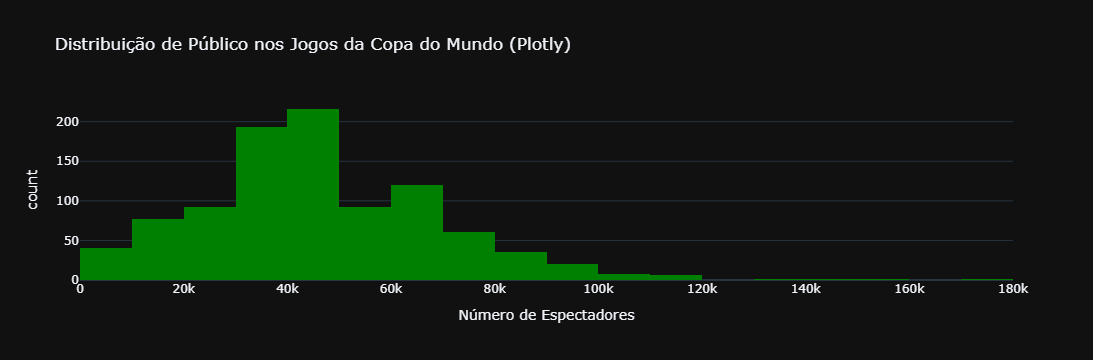

In [13]:
#### solução com plotly
import plotly.express as px

df_filtrado = df[df['Attendance'] > 0]

fig = px.histogram(df_filtrado, x='Attendance', nbins=30,
                   title='Distribuição de Público nos Jogos da Copa do Mundo (Plotly)',
                   labels={'Attendance':'Número de Espectadores', 'count':'Número de Jogos'},
                   color_discrete_sequence=['green'])
fig.show()

#### Q3.

Apresente um gráfico de dispersão (scatter) dos atributos `gols_1` e `gols_2`. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir
```python
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
```

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

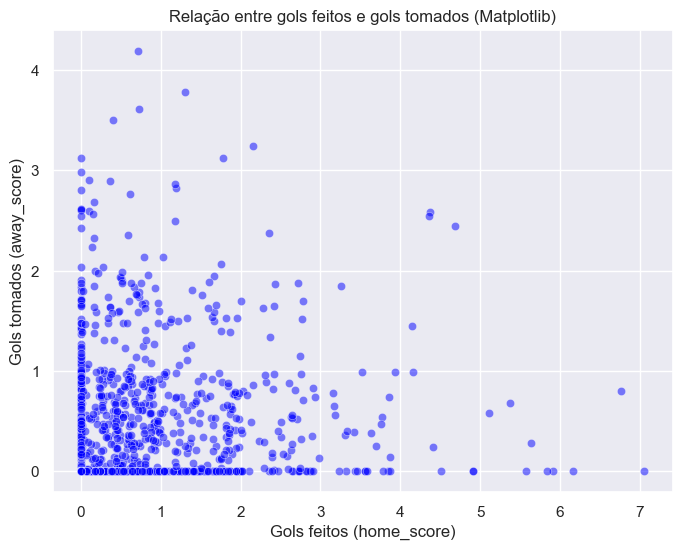

In [18]:
#### solução com matplotlib
#### solução com matplotlib

import numpy as np
import matplotlib.pyplot as plt

gols = wc[['home_score', 'away_score']] * np.random.random((len(wc), 2))

plt.figure(figsize=(8,6))
plt.scatter(gols['home_score'], gols['away_score'], alpha=0.5, color='blue', edgecolors='w', linewidth=0.5)
plt.title('Relação entre gols feitos e gols tomados (Matplotlib)')
plt.xlabel('Gols feitos (home_score)')
plt.ylabel('Gols tomados (away_score)')
plt.grid(True)
plt.show()

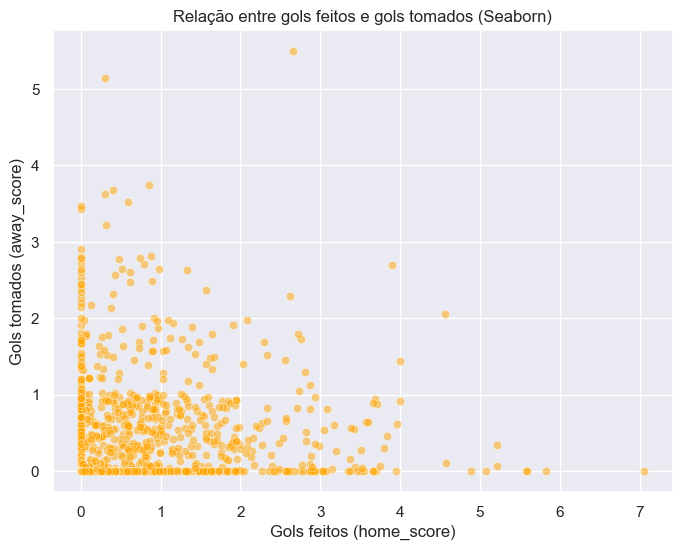

In [19]:
#### solução com seaborn
#### solução com seaborn

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

gols = wc[['home_score', 'away_score']] * np.random.random((len(wc), 2))

plt.figure(figsize=(8,6))
sns.scatterplot(x=gols['home_score'], y=gols['away_score'], alpha=0.5, color='orange', edgecolor='w', linewidth=0.5)
plt.title('Relação entre gols feitos e gols tomados (Seaborn)')
plt.xlabel('Gols feitos (home_score)')
plt.ylabel('Gols tomados (away_score)')
plt.show()

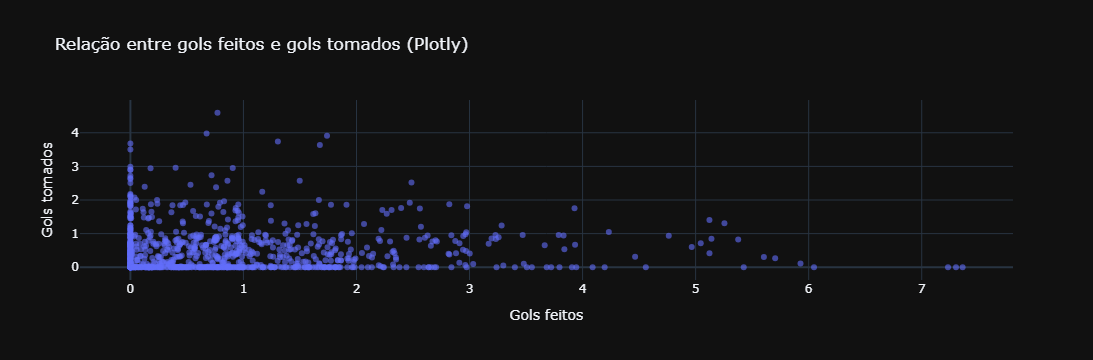

In [20]:
#### solução com plotly
#### solução com plotly

import numpy as np
import plotly.express as px

gols = wc[['home_score', 'away_score']] * np.random.random((len(wc), 2))

fig = px.scatter(gols, x='home_score', y='away_score',
                 title='Relação entre gols feitos e gols tomados (Plotly)',
                 labels={'home_score':'Gols feitos', 'away_score':'Gols tomados'},
                 opacity=0.6)
fig.show()

#### Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos:
* título
* rótulos de dimensão.
* legenda

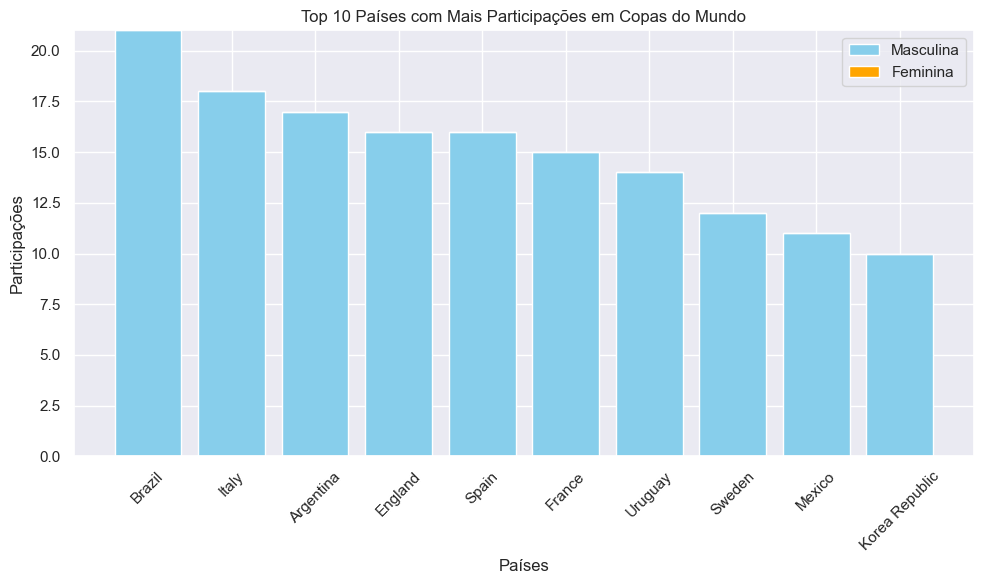

In [24]:
#### solução com matplotlib
#### solução com matplotlib
# ANOS DAS COPAS FEMININAS
anos_femininos = [1991, 1995, 1999, 2003, 2007, 2011, 2015, 2019, 2023]

# Dividindo os dataframes
wc_f = wc[wc['Year'].isin(anos_femininos)]
wc_m = wc[~wc['Year'].isin(anos_femininos)]
import matplotlib.pyplot as plt

# Dados
paises = participacoes_top10.index
masculina = participacoes_top10['Masculina']
feminina = participacoes_top10['Feminina']

# Gráfico
plt.figure(figsize=(10, 6))
plt.bar(paises, masculina, label='Masculina', color='skyblue')
plt.bar(paises, feminina, bottom=masculina, label='Feminina', color='orange')

# Rótulos
plt.title('Top 10 Países com Mais Participações em Copas do Mundo')
plt.xlabel('Países')
plt.ylabel('Participações')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

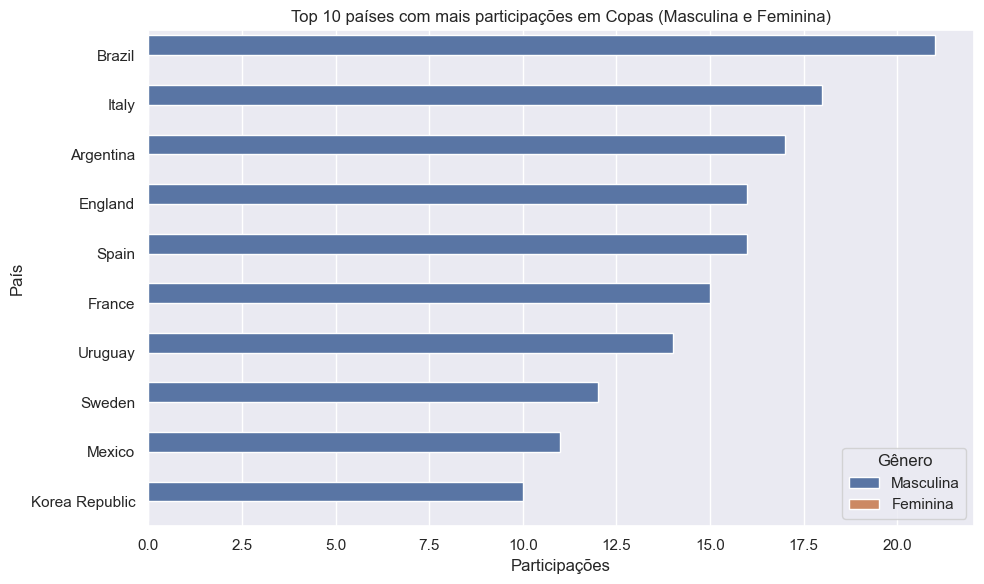

In [32]:
#### solução com seaborn
#### solução com seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que participacoes_top10 já está criado e tem índice com nome dos países
df_long = participacoes_top10[['Masculina', 'Feminina']].reset_index().melt(
    id_vars='País', 
    var_name='Gênero', 
    value_name='Participações'
)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='Participações', y='País', hue='Gênero')
plt.title('Top 10 países com mais participações em Copas (Masculina e Feminina)')
plt.xlabel('Participações')
plt.ylabel('País')
plt.tight_layout()
plt.show()

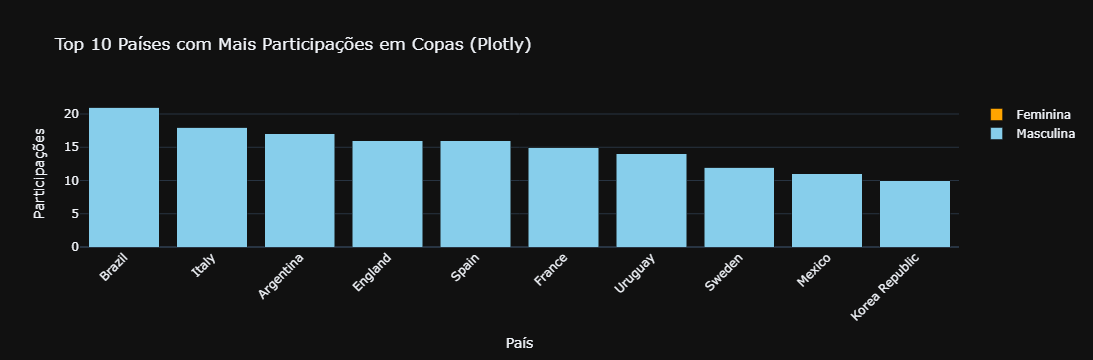

In [29]:
#### solução com plotly
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Masculina', x=participacoes_top10.index, y=participacoes_top10['Masculina'],
           marker_color='skyblue'),
    go.Bar(name='Feminina', x=participacoes_top10.index, y=participacoes_top10['Feminina'],
           marker_color='orange')
])

# Empilhar as barras
fig.update_layout(barmode='stack',
                  title='Top 10 Países com Mais Participações em Copas (Plotly)',
                  xaxis_title='País',
                  yaxis_title='Participações',
                  xaxis_tickangle=-45)
fig.show()

#### Q5.

Vamos fazer um compilado com as estatísticas históricas de copas do mundo!

Com a biblioteca de sua preferência você deve criar 4 subplots organizados em um grid de 2 linhas e 2 colunas. Eles devem conter os seguintes gráficos:
* Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos que aconteceram por ano
* Linha 1, coluna 2: Gráfico de área (referências a seguir) com o total de gols por ano, separando as informações de `gols_1` e `gols_2` para distinguir gols em casa e do time visitante.
* Linha 2, coluna 1: Gráfico de área com o total de cartões por ano, separando as informações de cartões amarelos e cartões vermelhos, mas agregando cartões do time 1 ou time 2. Ou seja, uma área com `cartao_amarelo_1 + cartao_amarelo_2` e outra área com `cartao_vermelho_1 + cartao_vermelho_2`.
* Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano, somando `gols_contra_1` e `gols_contra_2`.

Referências sobre gráfico de área
* Matplotlib: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py
* Pandas + Matplotlib: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html
* Seaborn: https://seaborn.pydata.org/generated/seaborn.objects.Area.html
* Plotly: https://plotly.com/python/filled-area-plots/

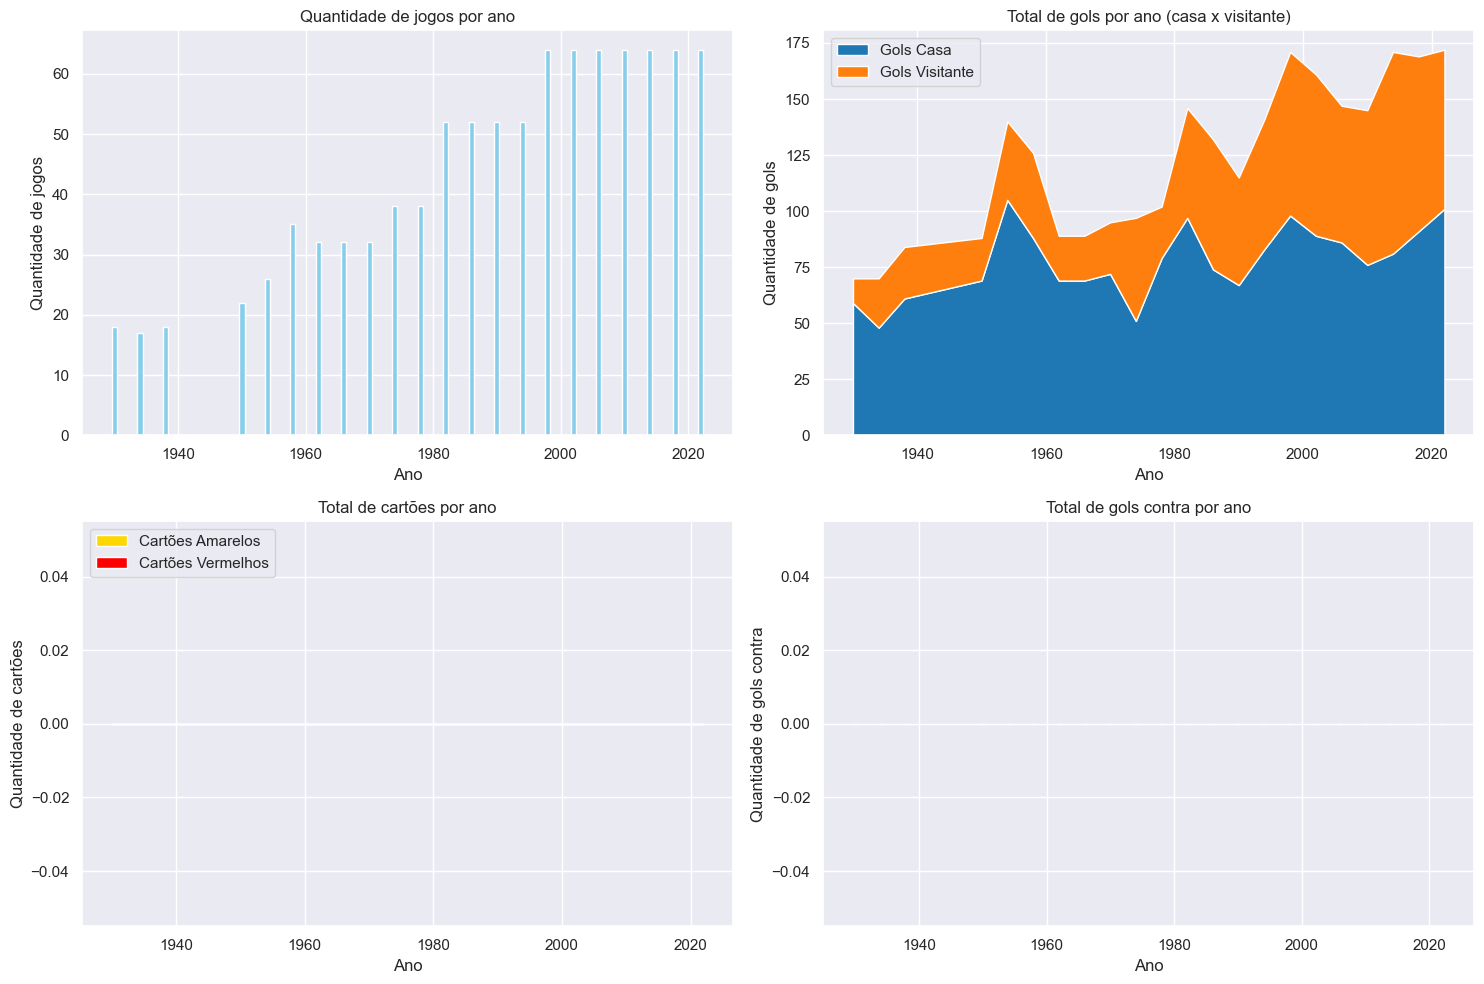

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemplo: suponha que seu DataFrame principal se chama df
# df = pd.read_csv('seu_arquivo.csv')  # Ajuste para carregar seus dados

# Vamos garantir que as colunas com contagem de cartões e gols contra sejam numéricas
colunas_numericas = [
    'home_yellow_card_long', 'away_yellow_card_long',
    'home_red_card', 'away_red_card',
    'home_own_goal', 'away_own_goal',
    'home_score', 'away_score'
]

for col in colunas_numericas:
    # Converte para numérico, força NaNs para 0
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# 1) Jogos por ano (contagem de partidas)
jogos_por_ano = df.groupby('Year').size()

# 2) Gols por ano, separando gols time casa e visitante
gols_por_ano = df.groupby('Year')[['home_score', 'away_score']].sum()

# 3) Cartões por ano: soma cartões amarelos e vermelhos, combinando times 1 e 2
cartoes_por_ano = df.groupby('Year')[[
    'home_yellow_card_long', 'away_yellow_card_long', 
    'home_red_card', 'away_red_card'
]].sum()

total_cartao_amarelo = cartoes_por_ano['home_yellow_card_long'] + cartoes_por_ano['away_yellow_card_long']
total_cartao_vermelho = cartoes_por_ano['home_red_card'] + cartoes_por_ano['away_red_card']

# 4) Gols contra por ano
gols_contra_por_ano = df.groupby('Year')[['home_own_goal', 'away_own_goal']].sum()
total_gols_contra = gols_contra_por_ano['home_own_goal'] + gols_contra_por_ano['away_own_goal']

# --- Plotagem ---

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Linha 1, Col 1: Jogos por ano (barras)
axs[0, 0].bar(jogos_por_ano.index, jogos_por_ano.values, color='skyblue')
axs[0, 0].set_title('Quantidade de jogos por ano')
axs[0, 0].set_xlabel('Ano')
axs[0, 0].set_ylabel('Quantidade de jogos')

# Linha 1, Col 2: Gols por ano (área empilhada)
axs[0, 1].stackplot(gols_por_ano.index, 
                   gols_por_ano['home_score'], 
                   gols_por_ano['away_score'], 
                   labels=['Gols Casa', 'Gols Visitante'],
                   colors=['#1f77b4', '#ff7f0e'])
axs[0, 1].set_title('Total de gols por ano (casa x visitante)')
axs[0, 1].set_xlabel('Ano')
axs[0, 1].set_ylabel('Quantidade de gols')
axs[0, 1].legend(loc='upper left')

# Linha 2, Col 1: Cartões por ano (área empilhada)
axs[1, 0].stackplot(cartoes_por_ano.index,
                   total_cartao_amarelo,
                   total_cartao_vermelho,
                   labels=['Cartões Amarelos', 'Cartões Vermelhos'],
                   colors=['gold', 'red'])
axs[1, 0].set_title('Total de cartões por ano')
axs[1, 0].set_xlabel('Ano')
axs[1, 0].set_ylabel('Quantidade de cartões')
axs[1, 0].legend(loc='upper left')

# Linha 2, Col 2: Gols contra por ano (barras)
axs[1, 1].bar(total_gols_contra.index, total_gols_contra.values, color='lightcoral')
axs[1, 1].set_title('Total de gols contra por ano')
axs[1, 1].set_xlabel('Ano')
axs[1, 1].set_ylabel('Quantidade de gols contra')

plt.tight_layout()
plt.show()